In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report , roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install boruta

In [3]:
loan = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [4]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan.shape

(614, 13)

In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
loan.shape

(614, 13)

In [10]:
FILL_NAN=loan[["Gender","Married","Dependents","Self_Employed","Loan_Amount_Term","Credit_History"]]

In [11]:
for i in FILL_NAN:
  print(i)

Gender
Married
Dependents
Self_Employed
Loan_Amount_Term
Credit_History


In [12]:
loan['LoanAmount'].mean()

146.41216216216216

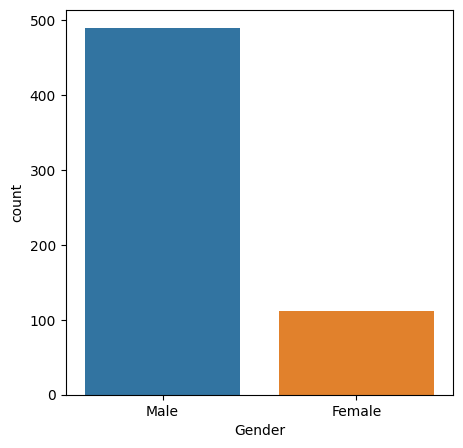

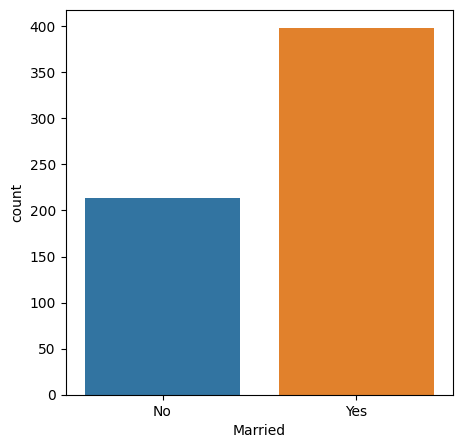

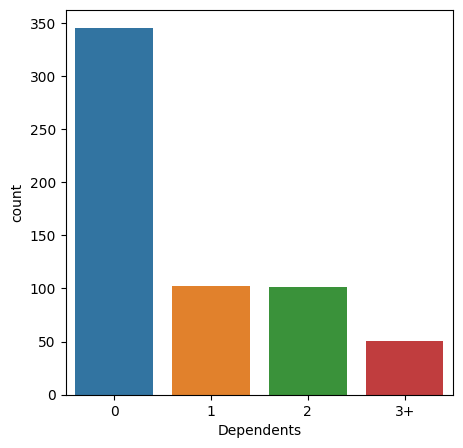

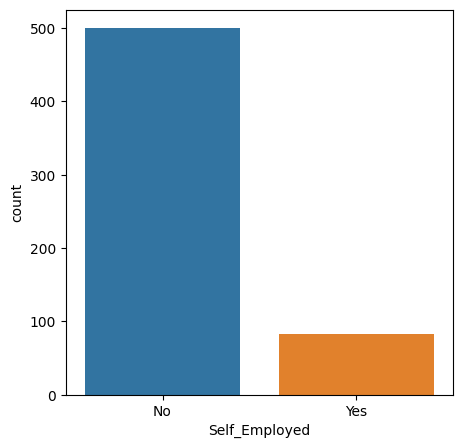

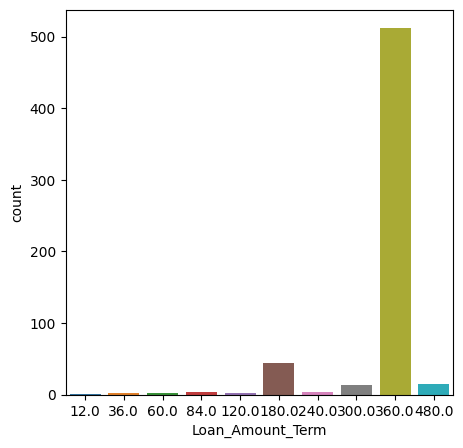

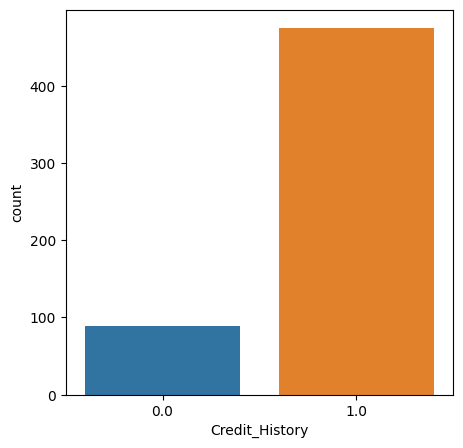

In [13]:
for i in FILL_NAN:
  plt.figure(figsize=(5,5))
  sns.countplot(x=loan[i])
  plt.show()

In [14]:
loan["Gender"]=loan["Gender"].replace(to_replace=np.nan,value="Male")
loan["Married"]=loan["Married"].replace(to_replace=np.nan,value="Yes")
loan["Dependents"]=loan["Dependents"].replace(to_replace=np.nan,value="0")
loan["Self_Employed"]=loan["Self_Employed"].replace(to_replace=np.nan,value="No")
loan["Loan_Amount_Term"]=loan["Loan_Amount_Term"].replace(to_replace=np.nan,value=360)
loan["Credit_History"]=loan["Credit_History"].replace(to_replace=np.nan,value=1.0)
loan["LoanAmount"]=loan["LoanAmount"].replace(to_replace=np.nan,value=146.41)

In [15]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
loan['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
loan["Dependents"]=loan["Dependents"].replace(to_replace="3+",value=3)

In [18]:
loan["Dependents"].unique()

array(['0', '1', '2', 3], dtype=object)

In [19]:
loan["Dependents"]=loan["Dependents"].astype(int)

In [20]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.00,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.00,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.00,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.00,360.0,1.0,Urban,Y


Encoding

In [21]:
loan.replace({'Loan_Status' : {'N' : 0, 'Y' : 1}},inplace = True)

In [22]:
cat_fea = loan[['Gender','Married','Education','Self_Employed','Property_Area']]

In [23]:
dummies = pd.get_dummies(data=cat_fea,drop_first=True)

In [24]:
## concattinating dummy feature to main DataFrame by column
df=pd.concat([loan,dummies],axis=1)

In [25]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,1,1,0,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,0,1,1,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,1,1,1,0,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,1,1,1,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.00,360.0,1.0,Rural,1,0,0,0,0,0,0
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.00,180.0,1.0,Rural,1,1,1,0,0,0,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.00,360.0,1.0,Urban,1,1,1,0,0,0,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.00,360.0,1.0,Urban,1,1,1,0,0,0,1


In [26]:
## dropping the feature which contains categorical data
df.drop(['Gender','Married','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

In [27]:
## Here We can see our data is ready to build model now.
df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,146.41,360.0,1.0,1,1,0,0,0,0,1
1,LP001003,1,4583,1508.0,128.00,360.0,1.0,0,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.00,360.0,1.0,1,1,1,0,1,0,1
3,LP001006,0,2583,2358.0,120.00,360.0,1.0,1,1,1,1,0,0,1
4,LP001008,0,6000,0.0,141.00,360.0,1.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.00,360.0,1.0,1,0,0,0,0,0,0
610,LP002979,3,4106,0.0,40.00,180.0,1.0,1,1,1,0,0,0,0
611,LP002983,1,8072,240.0,253.00,360.0,1.0,1,1,1,0,0,0,1
612,LP002984,2,7583,0.0,187.00,360.0,1.0,1,1,1,0,0,0,1


In [28]:
df = df.drop(['Loan_ID'],axis=1)

In [29]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412085,342.410423,0.855049,0.687296,0.817590,0.653094,0.218241,0.133550,0.379479,0.328990
std,1.009623,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.463973,0.386497,0.476373,0.413389,0.340446,0.485653,0.470229
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Model Building

In [30]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

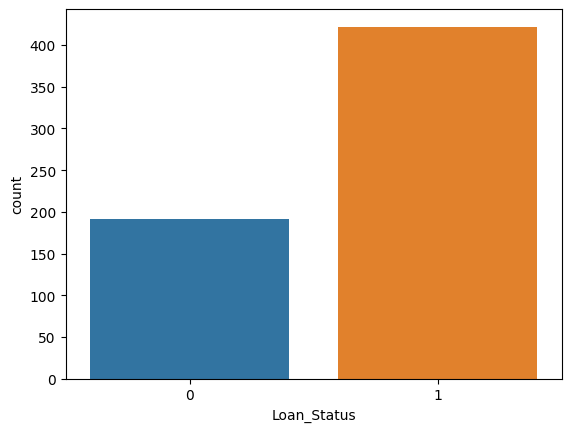

In [31]:
sns.countplot(x='Loan_Status',data=df)

In [32]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.41,360.0,1.0,1,1,0,0,0,0,1
1,1,4583,1508.0,128.00,360.0,1.0,0,1,1,0,0,0,0
2,0,3000,0.0,66.00,360.0,1.0,1,1,1,0,1,0,1
3,0,2583,2358.0,120.00,360.0,1.0,1,1,1,1,0,0,1
4,0,6000,0.0,141.00,360.0,1.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.00,360.0,1.0,1,0,0,0,0,0,0
610,3,4106,0.0,40.00,180.0,1.0,1,1,1,0,0,0,0
611,1,8072,240.0,253.00,360.0,1.0,1,1,1,0,0,0,1
612,2,7583,0.0,187.00,360.0,1.0,1,1,1,0,0,0,1


In [33]:
X = X=df[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban']]
Y = df['Loan_Status']

In [34]:
from imblearn.combine import SMOTETomek

In [35]:
## implementing oversampling for handling imbalanced dataset
smk = SMOTETomek(random_state=42)
X_res,Y_res = smk.fit_resample(X,Y)

In [36]:
X_res.shape,Y_res.shape

((712, 12), (712,))

In [37]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_res)))

Original dataset shape Counter({1: 422, 0: 192})
Resampled dataset shape Counter({1: 356, 0: 356})


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res ,test_size=0.2 ,random_state=100)

In [40]:
X_res

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.000000,146.410000,360.0,1.000000,1,0,0,0,0,1
1,0,3000,0.000000,66.000000,360.0,1.000000,1,1,0,1,0,1
2,0,2583,2358.000000,120.000000,360.0,1.000000,1,1,1,0,0,1
3,0,6000,0.000000,141.000000,360.0,1.000000,1,0,0,0,0,1
4,2,5417,4196.000000,267.000000,360.0,1.000000,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
707,1,4567,0.000000,103.739547,360.0,0.886680,0,0,0,0,0,0
708,0,11065,0.000000,112.480979,360.0,1.000000,1,0,0,0,0,0
709,1,3862,0.000000,62.734618,360.0,0.984695,0,0,0,0,0,0
710,0,8744,4221.315973,312.526331,360.0,0.933436,1,0,0,0,0,0


In [41]:
import statsmodels.api as sm
X=sm.add_constant(df)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
Stats_model = sm.Logit(Y_train,X_train)
Statistical_model=Stats_model.fit()

Optimization terminated successfully.
         Current function value: 0.476787
         Iterations 7


In [44]:
Statistical_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.312     
Dependent Variable:   Loan_Status        AIC:                566.5841  
Date:                 2023-07-04 15:16   BIC:                618.7107  
No. Observations:     569                Log-Likelihood:     -271.29   
Df Model:             11                 LL-Null:            -394.29   
Df Residuals:         557                LLR p-value:        1.9167e-46
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Dependents               0.0357   0.1217  0.2930 0.7695 -0.2029  0.2742
ApplicantIncome         -0.0000   0.0000 -0.3211 0.7482 -0.0001  0.0000
CoapplicantIncome       -0.0001   0.0000 -1.4356 0.1511 -0.0001  0.0000
LoanAmount              -0.0032   0.0019 -1.6588 0.0972 -0.0069  0.0006
Loan_Amount_Term        -0.0097   0.0012 -8.0619 0.0000 -0.0121 -0.0074
Credit_History           3.2716   0.3821  8.5632 0.0000  2.5228  4.0204
Gender_Male              0.0508   0.2769  0.1836 0.8543 -0.4918  0.5935
Married_Yes              0.9521   0.2402  3.9640 0.0001  0.4813  1.4228
Education_Not Graduate  -0.4060   0.2808 -1.4461 0.1482 -0.9564  0.1443
Self_Employed_Yes        0.5306   0.3762  1.4105 0.1584 -0.2067  1.2679
Property_Area_Semiurban  1.7076   0.2752  6.2054 0.0000  1.1683  2.2469
Property_Area_Urban      0.8274   0.2481  3.3355 0.0009  0.3412  1.3136
=======================================================================

"""

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Loan_Status              614 non-null    int64  
 7   Gender_Male              614 non-null    uint8  
 8   Married_Yes              614 non-null    uint8  
 9   Education_Not Graduate   614 non-null    uint8  
 10  Self_Employed_Yes        614 non-null    uint8  
 11  Property_Area_Semiurban  614 non-null    uint8  
 12  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(4), int64(3), uint8(6)
memory usage: 37.3 KB


In [46]:
Logitsic_model=LogisticRegression()
Logitsic_model.fit(X_train,Y_train)

LogisticRegression()

In [47]:
Logitsic_model_pred=Logitsic_model.predict(X_test)

In [48]:
print("Accuracy_score of Logistic Regression model on Test Data:",accuracy_score(Y_test,Logitsic_model_pred))

Accuracy_score of Logistic Regression model on Test Data: 0.7482517482517482


In [49]:
Logitsic_model_train_pred=Logitsic_model.predict(X_train)

In [50]:
print("Accuracy_score of Logistic Regression model on Train Data:",accuracy_score(Y_train,Logitsic_model_train_pred))

Accuracy_score of Logistic Regression model on Train Data: 0.7768014059753954


Here we can see there's not much of difference in training and testing data accurcy so we can say that model is not overfitting on data.

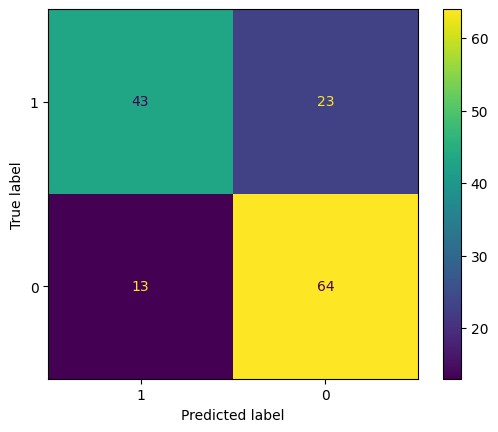

In [51]:
## Drawing Confusion matrix for logistic Regression Model.
from sklearn import metrics
confusion_matrix_Logistic_model=metrics.confusion_matrix(Y_test,Logitsic_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_Logistic_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()

In [53]:
RF_model.fit(X_train,Y_train)

RandomForestClassifier()

In [54]:
RF_model_pred=RF_model.predict(X_test)

In [55]:
RF_model_pred=RF_model.predict(X_test)

In [56]:
print("Accuracy_score of Random Forest model on Test Data:",accuracy_score(Y_test,RF_model_pred))

Accuracy_score of Random Forest model on Test Data: 0.8251748251748252


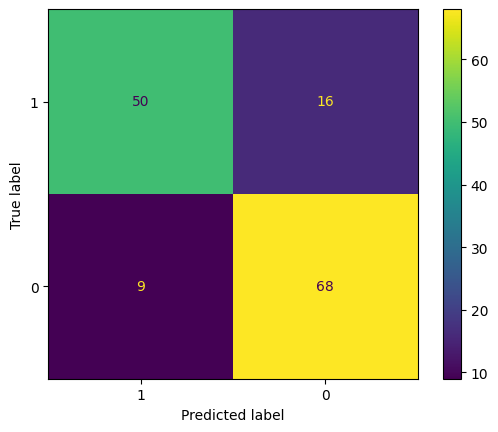

In [57]:
## Drawing Confusion matrix for Random Forest Model.
from sklearn import metrics
confusion_matrix_RF_model=metrics.confusion_matrix(Y_test,RF_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_RF_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

In [58]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier()

In [59]:
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [60]:
DT_model_pred=DT_model.predict(X_test)

In [61]:
print("Accuracy_score of Decision Tree model on Test Data:",accuracy_score(Y_test,DT_model_pred))

Accuracy_score of Decision Tree model on Test Data: 0.7692307692307693


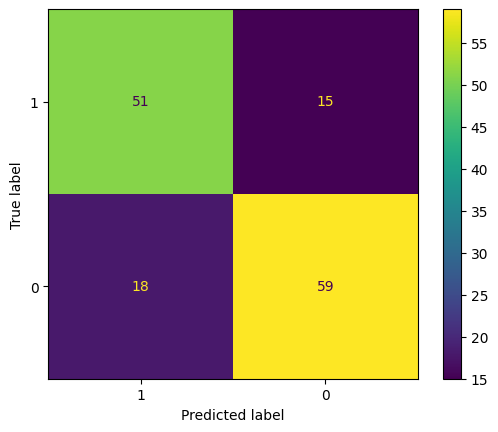

In [62]:
## Drawing Confusion matrix for Decision Tree Model.
from sklearn import metrics
confusion_matrix_DT_model=metrics.confusion_matrix(Y_test,DT_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_DT_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

In [63]:
from sklearn.ensemble import AdaBoostClassifier
ABC_model=AdaBoostClassifier()

In [64]:
ABC_model.fit(X_train,Y_train)

AdaBoostClassifier()

In [65]:
ABC_model_pred=ABC_model.predict(X_test)

In [66]:
print("Accuracy_score of AdaBoost model on Test Data:",accuracy_score(Y_test,ABC_model_pred))

Accuracy_score of AdaBoost model on Test Data: 0.8111888111888111


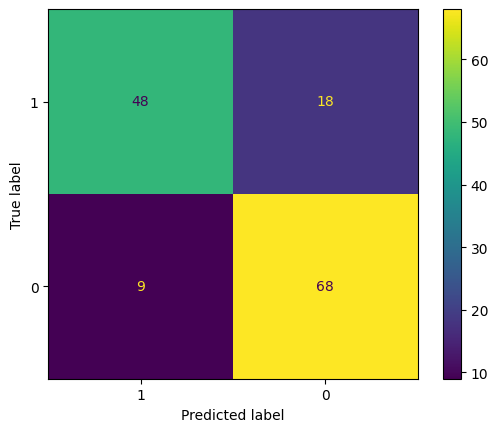

In [67]:
## Drawing Confusion matrix for Ada Boost Model.
from sklearn import metrics
confusion_matrix_ABC_model=metrics.confusion_matrix(Y_test,ABC_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_ABC_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

In [68]:
from sklearn.svm import SVC
SVC_model=SVC()

In [69]:
SVC_model.fit(X_train,Y_train)

SVC()

In [70]:
SVC_model_pred=SVC_model.predict(X_test)

In [71]:
print("Accuracy_score of SVC model on Test Data:",accuracy_score(Y_test,SVC_model_pred))

Accuracy_score of SVC model on Test Data: 0.4755244755244755


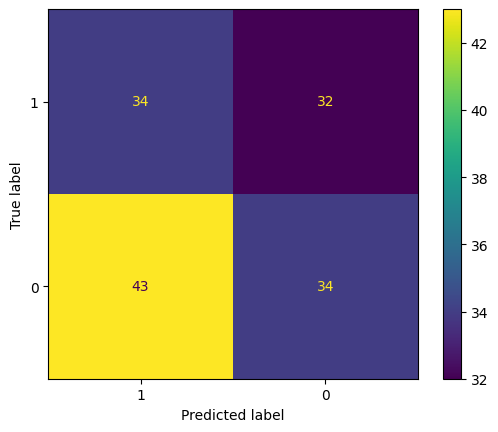

In [72]:
## Drawing Confusion matrix for SVC Model.
from sklearn import metrics
confusion_matrix_SVC_model=metrics.confusion_matrix(Y_test,SVC_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_SVC_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

In [73]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()

In [74]:
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [75]:
KNN_model_pred=KNN_model.predict(X_test)

In [76]:
print("Accuracy_score of SVC model on Test Data:",accuracy_score(Y_test,KNN_model_pred))

Accuracy_score of SVC model on Test Data: 0.6713286713286714


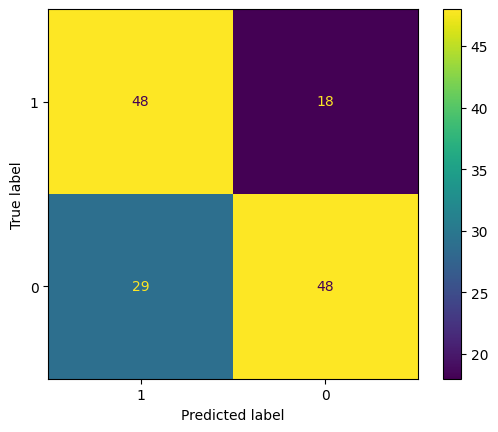

In [77]:
## Drawing Confusion matrix for KNN Model.
from sklearn import metrics
confusion_matrix_KNN_model=metrics.confusion_matrix(Y_test,KNN_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_KNN_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

From all the 6 algorithms Random Forest > Ada Boost > Logistic Regression > Decision Tree > KNN > SVC while predicting False Negative.We will work on tuning hyperparameters for this 3 Algorithms to reduced Recall.


FEATURE SELECTION



Feature Selection Using Boruta Feature Selection method

In [78]:
X_res.shape

(712, 12)

In [79]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.41,360.0,1.0,1,1,0,0,0,0,1
1,1,4583,1508.0,128.00,360.0,1.0,0,1,1,0,0,0,0
2,0,3000,0.0,66.00,360.0,1.0,1,1,1,0,1,0,1
3,0,2583,2358.0,120.00,360.0,1.0,1,1,1,1,0,0,1
4,0,6000,0.0,141.00,360.0,1.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.00,360.0,1.0,1,0,0,0,0,0,0
610,3,4106,0.0,40.00,180.0,1.0,1,1,1,0,0,0,0
611,1,8072,240.0,253.00,360.0,1.0,1,1,1,0,0,0,1
612,2,7583,0.0,187.00,360.0,1.0,1,1,1,0,0,0,1


In [80]:
from boruta import BorutaPy

In [81]:
feat_selector = BorutaPy(RF_model,n_estimators = 'auto',verbose=2,random_state=1)

In [82]:
X_res = X_res.to_numpy()

In [83]:
Y_res = Y_res.to_numpy()

In [84]:
feat_selector.fit(X_res,Y_res)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	9


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	9


BorutaPy(estimator=RandomForestClassifier(n_estimators=48,
                                          random_state=RandomState(MT19937) at 0x7F0306B02A40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F0306B02A40, verbose=2)

In [85]:
feat_selector.support_

array([False,  True, False,  True, False,  True, False, False, False,
       False, False, False])

In [86]:
print("Ranking: ",feat_selector.ranking_)

Ranking:  [6 1 3 1 5 1 8 4 9 9 2 7]


In [87]:
print("No of significant features: ",feat_selector.n_features_)

No of significant features:  3


In [88]:
selected_rf_features = pd.DataFrame({'feature':list(X_train.columns),
                                     'Ranking':feat_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,feature,Ranking
1,ApplicantIncome,1
3,LoanAmount,1
5,Credit_History,1
10,Property_Area_Semiurban,2
2,CoapplicantIncome,3
7,Married_Yes,4
4,Loan_Amount_Term,5
0,Dependents,6
11,Property_Area_Urban,7
6,Gender_Male,8


Using the BorutaPy object to transform the features in the dataset

In [89]:
best_features = feat_selector.transform(X_res)

In [90]:
best_features.shape

(712, 3)

Out of 12 Only 3 Features are imp

Building ML model using Important Features

In [91]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(best_features,Y_res,test_size=0.2,shuffle=True,random_state=100)

In [92]:
print(X_train1.shape)
print(X_test1.shape)

(569, 3)
(143, 3)


Logistic Regression Model After Feature Selection

In [93]:
LRF_model=LogisticRegression()

In [94]:
LRF_model.fit(X_train1,Y_train1)

LogisticRegression()

In [95]:
LRF_model_test_pred=LRF_model.predict(X_test1)

In [96]:
print("Accuracy score for Logistic regression After feature selection on testing data :",accuracy_score(Y_test1,LRF_model_test_pred))

Accuracy score for Logistic regression After feature selection on testing data : 0.7482517482517482


In [97]:
LRF_model_train_pred=LRF_model.predict(X_train1)

In [98]:
print("Accuracy score for Logistic regression After feature selection on training data :",accuracy_score(Y_train1,LRF_model_train_pred))

Accuracy score for Logistic regression After feature selection on training data : 0.7469244288224957


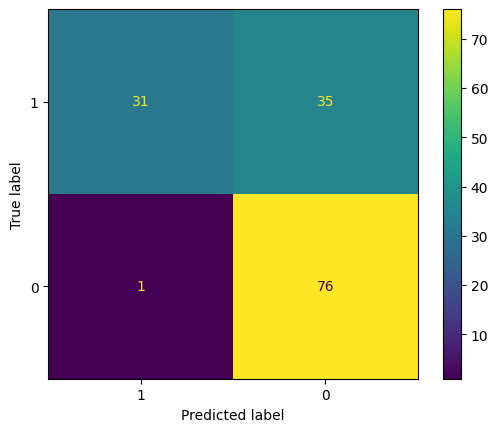

In [99]:
## Drawing Confusion matrix for logistic Regression Model after feature selection.
from sklearn import metrics
confusion_matrix_Logistic_model=metrics.confusion_matrix(Y_test1,LRF_model_test_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_Logistic_model   , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

Random Forest Model After Feature Selection

In [100]:
RFF_model=RandomForestClassifier()

In [101]:
RFF_model.fit(X_train1,Y_train1)

RandomForestClassifier()

In [102]:
RFF_model_pred=RFF_model.predict(X_test1)

In [103]:
print("Accuracy score for Random Forest Algorithm After feature selection :",accuracy_score(Y_test1,RFF_model_pred))

Accuracy score for Random Forest Algorithm After feature selection : 0.7762237762237763


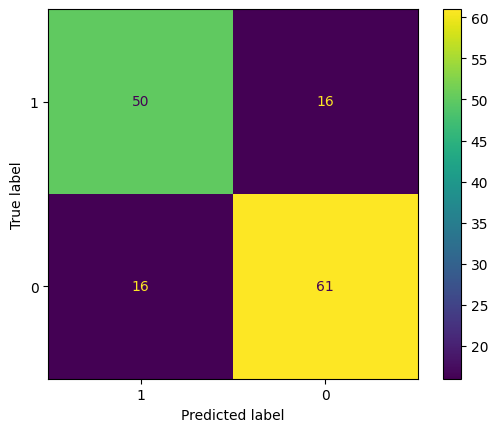

In [104]:
## Drawing Confusion matrix for Random Forest Model.
from sklearn import metrics
confusion_matrix_RF_model=metrics.confusion_matrix(Y_test1,RFF_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_RF_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

Decision Tree Algorithm after feature selection

In [105]:
DTF_model=DecisionTreeClassifier()

In [106]:
DTF_model.fit(X_train1,Y_train1)

DecisionTreeClassifier()

In [107]:
DTF_model_pred=DTF_model.predict(X_test1)

In [108]:
print("Accuracy score for Decision Tree Algorithm After feature selection :",accuracy_score(Y_test1,DTF_model_pred))

Accuracy score for Decision Tree Algorithm After feature selection : 0.7132867132867133


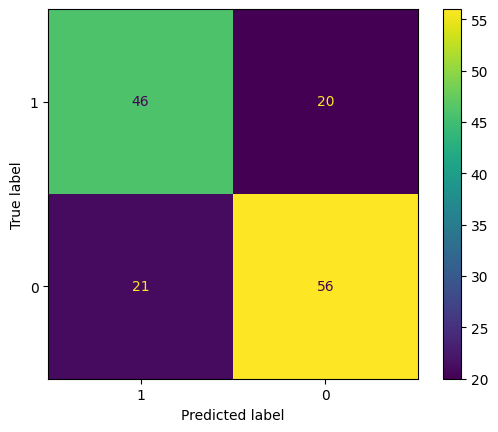

In [109]:
## Drawing Confusion matrix for Decision Tree Model.
from sklearn import metrics
confusion_matrix_DT_model=metrics.confusion_matrix(Y_test1,DTF_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_DT_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

AdaBoost Algorithm After Feature Selection

In [110]:
ABFC_model=AdaBoostClassifier()

In [111]:
ABFC_model.fit(X_train1,Y_train1)

AdaBoostClassifier()

In [112]:
ABFC_model_pred=ABFC_model.predict(X_test1)

In [113]:
print("Accuracy score for Adaboost Algorithm After feature selection :",accuracy_score(Y_test1,ABFC_model_pred))

Accuracy score for Adaboost Algorithm After feature selection : 0.7832167832167832


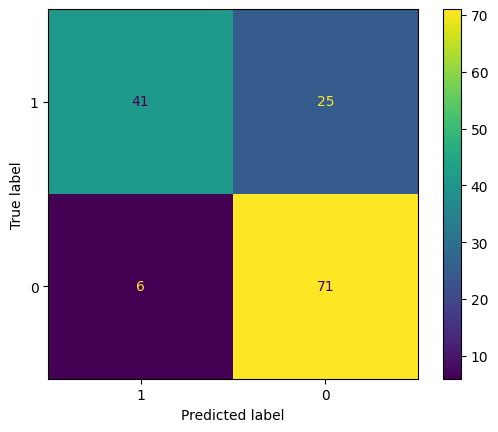

In [114]:
## Drawing Confusion matrix for Ada Boost Model.
from sklearn import metrics
confusion_matrix_ABC_model=metrics.confusion_matrix(Y_test1,ABFC_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_ABC_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

Support Vector Classifier Algorithm after Feature Selection

In [115]:
svcf_model=SVC()

In [116]:
svcf_model.fit(X_train1,Y_train1)

SVC()

In [117]:
svcf_model_pred=svcf_model.predict(X_test1)

In [118]:
print("Accuracy score for Random Forest Algorithm After feature selection :",accuracy_score(Y_test1,svcf_model_pred))

Accuracy score for Random Forest Algorithm After feature selection : 0.42657342657342656


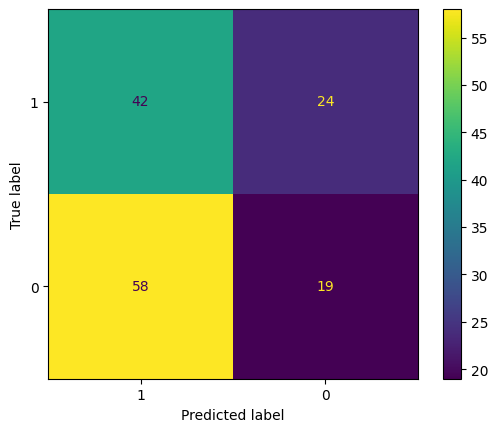

In [119]:
## Drawing Confusion matrix for SVC Model.
from sklearn import metrics
confusion_matrix_SVC_model=metrics.confusion_matrix(Y_test1,svcf_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_SVC_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

KNN Algorithm after Feature Selection

In [120]:
KNNF_model=KNeighborsClassifier()

In [121]:
KNNF_model.fit(X_train1,Y_train1)

KNeighborsClassifier()

In [122]:
KNNF_model_pred=KNNF_model.predict(X_test1)

In [123]:
print("Accuracy score for KNN Algorithm After feature selection :",accuracy_score(Y_test1,KNNF_model_pred))

Accuracy score for KNN Algorithm After feature selection : 0.6363636363636364


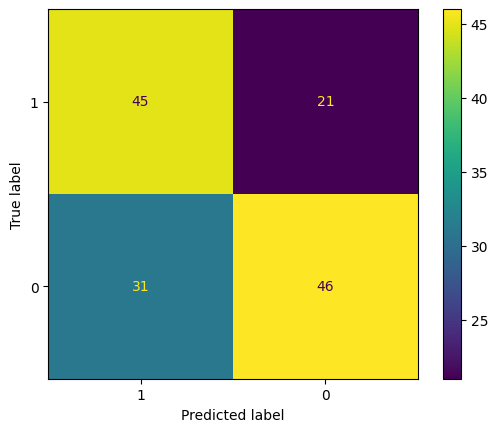

In [124]:
## Drawing Confusion matrix for KNN Model.
from sklearn import metrics
confusion_matrix_KNN_model=metrics.confusion_matrix(Y_test1,KNNF_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_KNN_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

# HYPERPARAMETER TUNING AND IMPROVING ACCURACY

## Hyperparameter Tunning for Logistic Regression

In [125]:
parameters_for_logistic_regression={
    "penalty" : ["l1" ,"l2" , "none" , "elasticnet"],
    "solver" : ["liblinear","sag","saga",'newton-cg', 'lbfgs']
    }

In [126]:
classification_for_LRF=GridSearchCV(Logitsic_model,parameters_for_logistic_regression,cv=10)

In [127]:
classification_for_LRF.fit(X_res,Y_res)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'none', 'elasticnet'],
                         'solver': ['liblinear', 'sag', 'saga', 'newton-cg',
                                    'lbfgs']})

In [128]:
## These are the default paramters that had been used to build previous model so we don't have to build new model based on this params.
classification_for_LRF.best_params_

{'penalty': 'none', 'solver': 'newton-cg'}

## Hyperparameter Tuning for Random Forest Classification Algorithm

In [129]:
parameters_for_Random_Forest_classification = {
    "n_estimators" : [60,70,80,90,100,110,120,130,140,150],
    "max_depth" : [8,9,10,11,12,14,16,18,19,20,21,22,23,24,25,26,27,28,29,30],
    "min_samples_split":[1,2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "criterion": ["gini","entropy","log_loss"]
    }

In [130]:
classification_for_rfc=RandomizedSearchCV(RF_model,parameters_for_Random_Forest_classification,cv=10)

In [131]:
classification_for_rfc.fit(X_res,Y_res)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_estimators=48,
                                                    random_state=RandomState(MT19937) at 0x7F0306B02A40),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [8, 9, 10, 11, 12, 14, 16,
                                                      18, 19, 20, 21, 22, 23,
                                                      24, 25, 26, 27, 28, 29,
                                                      30],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [60, 70, 80, 90, 100,
                                                         110, 120, 130, 140,
                                                         150]})

In [132]:
print(classification_for_rfc.best_params_)

{'n_estimators': 120, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 11, 'criterion': 'log_loss'}


In [133]:
rfc_model_with_pm1=RandomForestClassifier(n_estimators=90 ,
 min_samples_split=2,
 min_samples_leaf=2,
 max_depth=10,
 criterion='entropy' )

In [134]:
rfc_model_with_pm1.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       n_estimators=90)

In [135]:
rfc_model_with_pm1_pred=rfc_model_with_pm1.predict(X_test)

In [136]:
print("accuracy score for Random Forest after parameter tunning:",accuracy_score(Y_test,rfc_model_with_pm1_pred))

accuracy score for Random Forest after parameter tunning: 0.8321678321678322


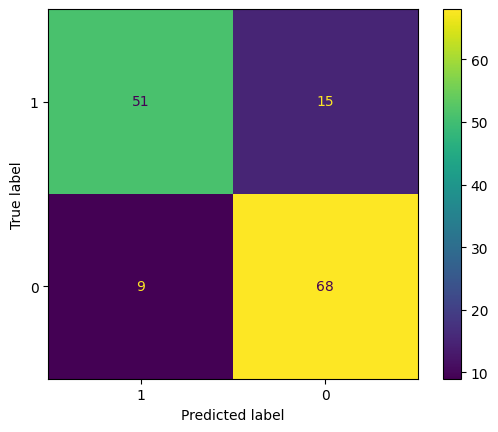

In [137]:
## Drawing Confusion matrix for Random Forest Model after hyperparameter tunning for 12 features
from sklearn import metrics
confusion_matrix_RF_model=metrics.confusion_matrix(Y_test,rfc_model_with_pm1_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_RF_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

In [138]:
classification_for_rfc2=RandomizedSearchCV(RFF_model,parameters_for_Random_Forest_classification,cv=10)

In [139]:
classification_for_rfc2.fit(best_features,Y_res)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [8, 9, 10, 11, 12, 14, 16,
                                                      18, 19, 20, 21, 22, 23,
                                                      24, 25, 26, 27, 28, 29,
                                                      30],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [60, 70, 80, 90, 100,
                                                         110, 120, 130, 140,
                                                         150]})

In [140]:
print(classification_for_rfc2.best_params_)

{'n_estimators': 140, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 8, 'criterion': 'gini'}


In [141]:
rfc_model_with_pm2=RandomForestClassifier(n_estimators= 140,
 min_samples_split=3,
 min_samples_leaf=1,
 max_depth=20,
 criterion='entropy' )

In [142]:
rfc_model_with_pm2.fit(X_train1,Y_train1)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=140)

In [143]:
rfc_model_with_pm2_pred=rfc_model_with_pm2.predict(X_test1)

In [144]:
print("accuracy score for Random Forest after parameter tunning:",accuracy_score(Y_test1,rfc_model_with_pm2_pred))

accuracy score for Random Forest after parameter tunning: 0.7552447552447552


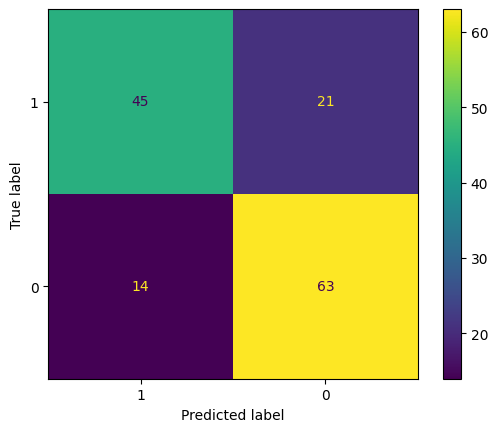

In [145]:
## Drawing Confusion matrix for Random Forest Model with selected 3 features after hyperparameter tunning.
from sklearn import metrics
confusion_matrix_RF_model=metrics.confusion_matrix(Y_test1,rfc_model_with_pm2_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_RF_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

## Hyperparameter Tunning For Decision Tree Algorithm

In [146]:
parameters_for_decision_tree_classification={
    "criterion" : ["gini","entropy","log_loss"],
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
    "min_samples_split": [1,2,3,4,5,6,7,8,9,10],
    "min_samples_leaf" : [1,2,3,4,5,6,7,8,9,10]
}

In [147]:
classification_for_dtc=RandomizedSearchCV(DT_model,parameters_for_decision_tree_classification,cv=10)

In [148]:
classification_for_dtc.fit(X_res,Y_res)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10]})

In [149]:
classification_for_dtc.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_depth': 6,
 'criterion': 'entropy'}

In [150]:
dtc_model_with_pm1=DecisionTreeClassifier(min_samples_split= 10,min_samples_leaf= 5,max_depth=5,criterion= 'gini')

In [151]:
dtc_model_with_pm1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [152]:
dtc_model_with_pm1_pred=dtc_model_with_pm1.predict(X_test)

In [153]:
print("accuracy score for Decision Tree after parameter tunning:",accuracy_score(Y_test,dtc_model_with_pm1_pred))

accuracy score for Decision Tree after parameter tunning: 0.7902097902097902


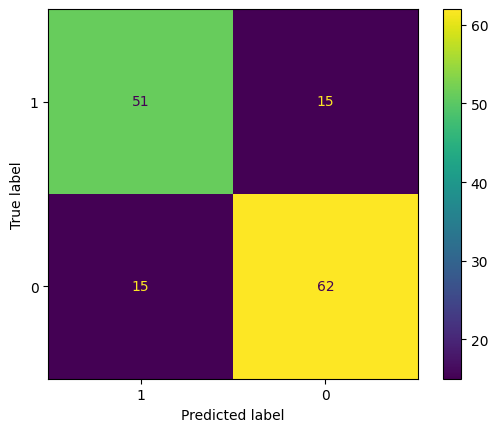

In [154]:
## Drawing Confusion matrix for Decision Tree Model with 12 Features after hyperparameter tunning.
from sklearn import metrics
confusion_matrix_DT_model=metrics.confusion_matrix(Y_test,dtc_model_with_pm1_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_DT_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

In [155]:
classification_for_dtc2=RandomizedSearchCV(DTF_model,parameters_for_decision_tree_classification,cv=10)

In [156]:
classification_for_dtc2.fit(best_features,Y_res)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10]})

In [157]:
print(classification_for_dtc2.best_params_)

{'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 1, 'criterion': 'log_loss'}


In [158]:
dtc_model_with_pm2=DecisionTreeClassifier(min_samples_split= 10, min_samples_leaf=7, max_depth= 1, criterion= 'log_loss')

In [159]:
dtc_model_with_pm2.fit(X_train1,Y_train1)

DecisionTreeClassifier(criterion='log_loss', max_depth=1, min_samples_leaf=7,
                       min_samples_split=10)

In [160]:
dtc_model_with_pm2_pred=dtc_model_with_pm2.predict(X_test1)

In [161]:
print("accuracy score for Decision Tree with selected features after parameter tunning:",accuracy_score(Y_test,dtc_model_with_pm2_pred))

accuracy score for Decision Tree with selected features after parameter tunning: 0.7762237762237763


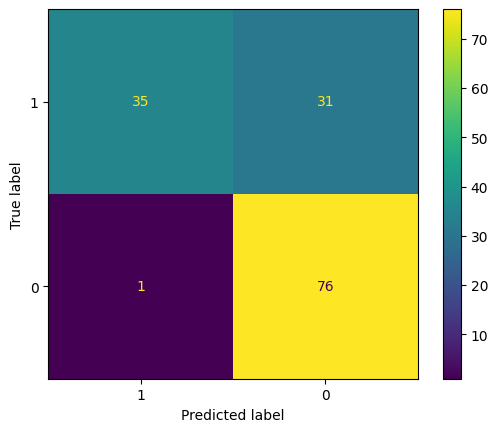

In [162]:
## Drawing Confusion matrix for Decision Tree Model with 3 features after hyperparameter tunning.
from sklearn import metrics
confusion_matrix_DT_model=metrics.confusion_matrix(Y_test1,dtc_model_with_pm2_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_DT_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

## Hyperparameter Tunning for AdaBoost Algorithm

In [163]:
parameters_for_adaboost_classifier={
    "n_estimators" : [20,30,40,50,60,70,80,90,100,110,120,130],
    "learning_rate":[0.0001,0.001,0.01,0.1,1]
}

In [164]:
classification_for_abc=RandomizedSearchCV(ABC_model,parameters_for_adaboost_classifier,cv=10)

In [165]:
classification_for_abc.fit(X_res,Y_res)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'n_estimators': [20, 30, 40, 50, 60, 70,
                                                         80, 90, 100, 110, 120,
                                                         130]})

In [166]:
print(classification_for_abc.best_params_)

{'n_estimators': 120, 'learning_rate': 0.1}


In [167]:
abc_model_with_pm1=AdaBoostClassifier(n_estimators=110,learning_rate=1)

In [168]:
abc_model_with_pm1.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=110)

In [169]:
abc_model_with_pm1_pred=abc_model_with_pm1.predict(X_test)

In [170]:
print("accuracy score for AdaBoost Classifier with 12 features after parameter tunning:",accuracy_score(Y_test,abc_model_with_pm1_pred))

accuracy score for AdaBoost Classifier with 12 features after parameter tunning: 0.8111888111888111


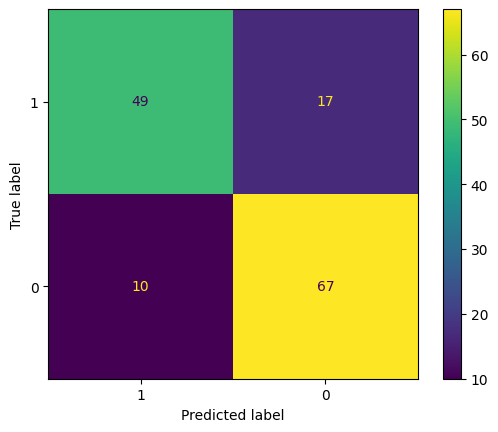

In [171]:
## Drawing Confusion matrix for Ada Boost Classfier Model with 12 features after hyperparameter tunning.
from sklearn import metrics
confusion_matrix_ABC_model=metrics.confusion_matrix(Y_test,abc_model_with_pm1_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_ABC_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

In [172]:
classification_for_abc2=RandomizedSearchCV(ABFC_model,parameters_for_adaboost_classifier,cv=10)

In [173]:
classification_for_abc2.fit(best_features,Y_res)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'n_estimators': [20, 30, 40, 50, 60, 70,
                                                         80, 90, 100, 110, 120,
                                                         130]})

In [174]:
print(classification_for_abc2.best_params_)

{'n_estimators': 40, 'learning_rate': 0.0001}


In [175]:
abc_model_with_pm2=AdaBoostClassifier(n_estimators=50,learning_rate=0.0001)

In [176]:
abc_model_with_pm2.fit(X_train1,Y_train1)

AdaBoostClassifier(learning_rate=0.0001)

In [177]:
abc_model_with_pm2_pred=abc_model_with_pm2.predict(X_test1)

In [178]:
print("accuracy score for AdaBoost Classifier with 3 features after parameter tunning:",accuracy_score(Y_test1,abc_model_with_pm2_pred))

accuracy score for AdaBoost Classifier with 3 features after parameter tunning: 0.7762237762237763


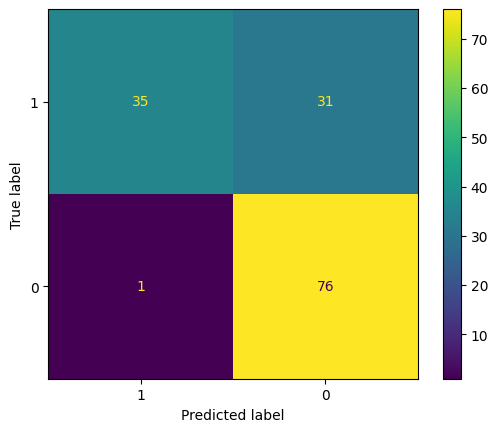

In [179]:
## Drawing Confusion matrix for Ada Boost Classfier Model with 3 features after hyperparameter tunning.
from sklearn import metrics
confusion_matrix_ABCF_model=metrics.confusion_matrix(Y_test1,abc_model_with_pm2_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_ABCF_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

## Model Performance Evaluation

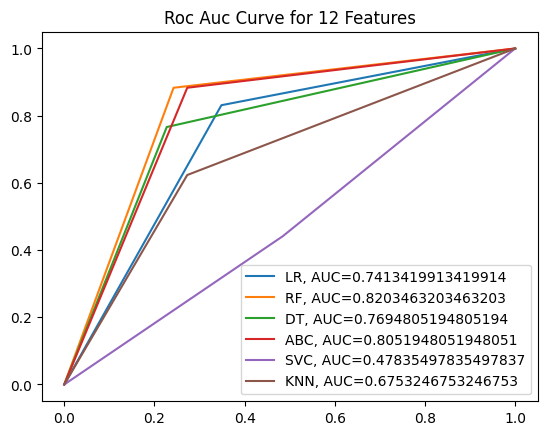

In [184]:
plt.figure(0).clf()
plt.title("Roc Auc Curve for 12 Features")


##For Logistic Regression
fpr,tpr, _= metrics.roc_curve(Y_test,Logitsic_model_pred)
auc_logistic_model=metrics.roc_auc_score(Y_test,Logitsic_model_pred)
plt.plot(fpr,tpr,label="LR, AUC="+str(auc_logistic_model))

##For Random Forest
fpr,tpr, _= metrics.roc_curve(Y_test,RF_model_pred)
auc_RF_model=metrics.roc_auc_score(Y_test,RF_model_pred)
plt.plot(fpr,tpr,label="RF, AUC="+str(auc_RF_model))

##For Decisio Tree
fpr,tpr, _= metrics.roc_curve(Y_test,DT_model_pred)
auc_DT_model=metrics.roc_auc_score(Y_test,DT_model_pred)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc_DT_model))

##For Ada Boost
fpr,tpr, _= metrics.roc_curve(Y_test,ABC_model_pred)
auc_ABC_model=metrics.roc_auc_score(Y_test,ABC_model_pred)
plt.plot(fpr,tpr,label="ABC, AUC="+str(auc_ABC_model))

##For Support Vector
fpr,tpr, _= metrics.roc_curve(Y_test,SVC_model_pred)
auc_SVC_model=metrics.roc_auc_score(Y_test,SVC_model_pred)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc_SVC_model))

##For KNN
fpr,tpr, _= metrics.roc_curve(Y_test,KNN_model_pred)
auc_KNN_model=metrics.roc_auc_score(Y_test,KNN_model_pred)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc_KNN_model))

plt.legend()

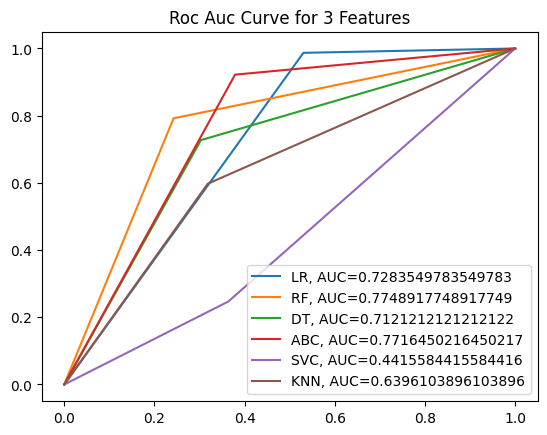

In [185]:
plt.figure(0).clf()
plt.title("Roc Auc Curve for 3 Features")

##For LR
fpr,tpr, _= metrics.roc_curve(Y_test1,LRF_model_test_pred)
auc_logistic_model=metrics.roc_auc_score(Y_test1,LRF_model_test_pred)
plt.plot(fpr,tpr,label="LR, AUC="+str(auc_logistic_model))

##For RF
fpr,tpr, _= metrics.roc_curve(Y_test1,RFF_model_pred)
auc_RF_model=metrics.roc_auc_score(Y_test1,RFF_model_pred)
plt.plot(fpr,tpr,label="RF, AUC="+str(auc_RF_model))

##For DT
fpr,tpr, _= metrics.roc_curve(Y_test1,DTF_model_pred)
auc_DT_model=metrics.roc_auc_score(Y_test1,DTF_model_pred)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc_DT_model))

##For ABC
fpr,tpr, _= metrics.roc_curve(Y_test1,ABFC_model_pred)
auc_ABC_model=metrics.roc_auc_score(Y_test1,ABFC_model_pred)
plt.plot(fpr,tpr,label="ABC, AUC="+str(auc_ABC_model))

##For SVC
fpr,tpr, _= metrics.roc_curve(Y_test1,svcf_model_pred)
auc_SVC_model=metrics.roc_auc_score(Y_test1,svcf_model_pred)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc_SVC_model))

##For KNN
fpr,tpr, _= metrics.roc_curve(Y_test1,KNNF_model_pred)
auc_KNN_model=metrics.roc_auc_score(Y_test1,KNNF_model_pred)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc_KNN_model))

plt.legend()


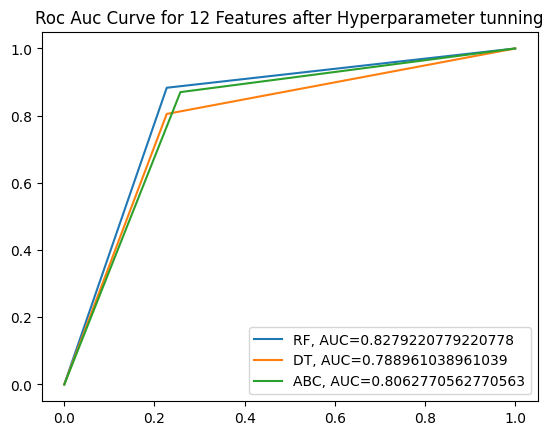

In [186]:
plt.figure(0).clf()
plt.title("Roc Auc Curve for 12 Features after Hyperparameter tunning")




##For Random Forest
fpr,tpr, _= metrics.roc_curve(Y_test,rfc_model_with_pm1_pred)
auc_RF_model=metrics.roc_auc_score(Y_test,rfc_model_with_pm1_pred)
plt.plot(fpr,tpr,label="RF, AUC="+str(auc_RF_model))

##For Decisio Tree
fpr,tpr, _= metrics.roc_curve(Y_test,dtc_model_with_pm1_pred)
auc_DT_model=metrics.roc_auc_score(Y_test,dtc_model_with_pm1_pred)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc_DT_model))

##For Ada Boost
fpr,tpr, _= metrics.roc_curve(Y_test,abc_model_with_pm1_pred)
auc_ABC_model=metrics.roc_auc_score(Y_test,abc_model_with_pm1_pred)
plt.plot(fpr,tpr,label="ABC, AUC="+str(auc_ABC_model))


plt.legend()

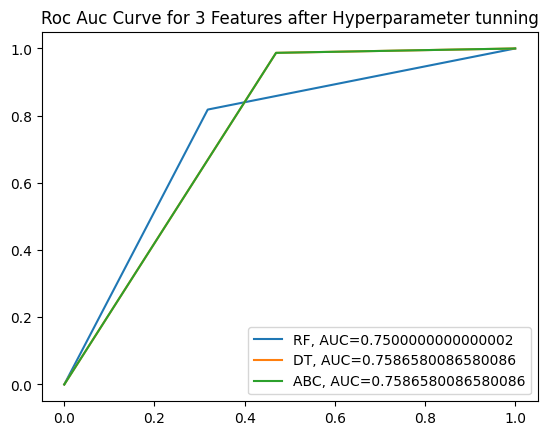

In [187]:
plt.figure(0).clf()
plt.title("Roc Auc Curve for 3 Features after Hyperparameter tunning")




##For Random Forest
fpr,tpr, _= metrics.roc_curve(Y_test1,rfc_model_with_pm2_pred)
auc_RF_model=metrics.roc_auc_score(Y_test1,rfc_model_with_pm2_pred)
plt.plot(fpr,tpr,label="RF, AUC="+str(auc_RF_model))

##For Decisio Tree
fpr,tpr, _= metrics.roc_curve(Y_test1,dtc_model_with_pm2_pred)
auc_DT_model=metrics.roc_auc_score(Y_test1,dtc_model_with_pm2_pred)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc_DT_model))

##For Ada Boost
fpr,tpr, _= metrics.roc_curve(Y_test1,abc_model_with_pm2_pred)
auc_ABC_model=metrics.roc_auc_score(Y_test1,abc_model_with_pm2_pred)
plt.plot(fpr,tpr,label="ABC, AUC="+str(auc_ABC_model))


plt.legend()